In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv('cardio_train.csv')

# Display the first few rows of the dataset
df.head()


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [2]:
# Data preprocessing

# Encode categorical variables
df = pd.read_csv('cardio_train.csv', delimiter=';')

# Display the column names in the dataset
print(df.columns)


# Split data into train and test
X = df.drop('cardio', axis=1)
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


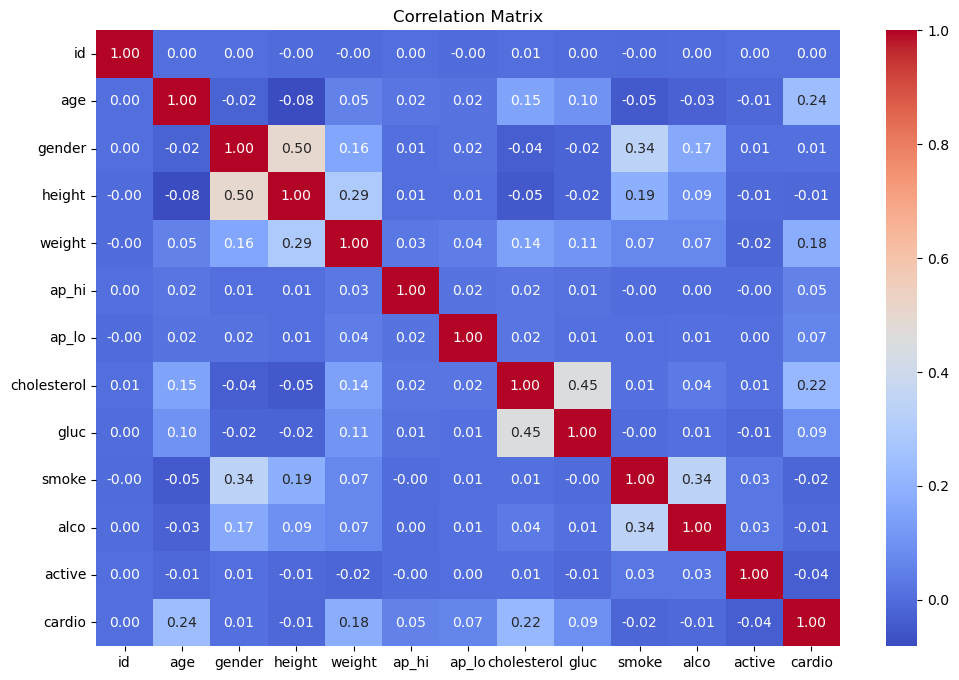

In [3]:
# Exploratory data analysis and visualizations

# Correlation Matrix Visualization

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Traning The Model
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(name, 'accuracy:', accuracy)


SVM accuracy: 0.728
Decision Tree accuracy: 0.6326666666666667
Random Forest accuracy: 0.7264285714285714
KNN accuracy: 0.6237619047619047
Logistic Regression accuracy: 0.7198095238095238


In [5]:
# Choose the best model, re-train
best_model = models['Random Forest']
best_model.fit(X, y)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Final Model Accuracy:', accuracy) 


C:\Users\Nuthan Reddy\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Final Model Accuracy: 0.4980476190476191


In [6]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


array([[10455,     6],
       [10535,     4]], dtype=int64)